# Numerical Optimisation and root-finding with Scipy

# Importance of Numerical Optimization for Quants

Numerical optimization is a foundational tool in quantitative finance. It involves finding the best solution (maximum or minimum) to a problem under given constraints, often when analytical solutions are unavailable or impractical.

## Why Numerical Optimization Matters

- **Portfolio Optimization**: Helps allocate assets to maximize return or minimize risk under constraints like budget, exposure, or regulatory limits.
- **Model Calibration**: Fits financial models to market data by minimizing error between observed and predicted values.
- **Risk Management**: Optimizes hedging strategies and capital allocation to reduce exposure to adverse market movements.
- **Trading Algorithms**: Tunes parameters of execution strategies to minimize slippage, transaction costs, or maximize alpha.
- **Machine Learning**: Powers training of models via loss function minimization (e.g., gradient descent in neural networks).

## How Different Quant Roles Use Numerical Optimization

| Quant Role                 | Optimization Applications                                                                 |
|---------------------------|-------------------------------------------------------------------------------------------|
| **Portfolio Quant**         | Solves mean-variance optimization, risk parity, and factor-based allocation problems. |
| **Risk Quant**              | Optimizes capital buffers and stress testing scenarios to meet regulatory requirements. |
| **Trading Quant**           | Calibrates execution algorithms and optimizes signal thresholds for trade entry/exit. |
| **Quantitative Researcher** | Fits pricing models to market data using nonlinear optimization techniques. |
| **Model Validation Quant**  | Tests model robustness by re-optimizing under perturbed inputs and alternative constraints. |
| **ML/Data Science Quant**   | Trains predictive models using optimization algorithms like SGD, Adam, or L-BFGS. |




### 1. Root Finding
**Remark:** Root-finding problems can be recast as minimisation problem. For example, solving $f(x) = c$ can be tackled as
\begin{equation*}
\min_{x} \left[f(x)-c\right]^2.
\end{equation*}
### The newton Raphson method for root finding

The Newton Raphson method

$$x_{1} = x_0 - \frac{f(x_0)}{f'(x_0)}$$
is a better approximation of the root than $x_0$. The process is repeated,

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

until $|x_{n+1}-x_n|\leq \epsilon$ for some small tolerance $\epsilon>0$ or $n=N$ where $N\in \mathbb{N}$ is our iteration tolerance

In [1]:
def newton_raphson(x0, tol=1e-2, max_iter=10):
    x_vals = [x0]
    for _ in range(max_iter):
        x_new = x_vals[-1] - f(x_vals[-1]) / f_prime(x_vals[-1])
        x_vals.append(x_new)
        if abs(x_new - x_vals[-2]) < tol:
            break
    return x_vals

We will apply newton Raphson to $f(x)=x^3-6x^2+11x-6$, where $f'(x)=3x^2=12x+11$

In [2]:
def f(x):
    return x**3 - 6*x**2 + 11*x - 6  # Roots at x=1,2,3

def f_prime(x):
    return 3*x**2 - 12*x + 11

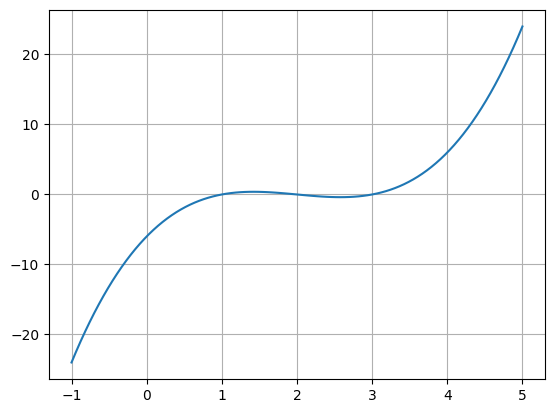

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-1,5,100)
plt.plot(x,f(x))
plt.grid(True)
plt.show()

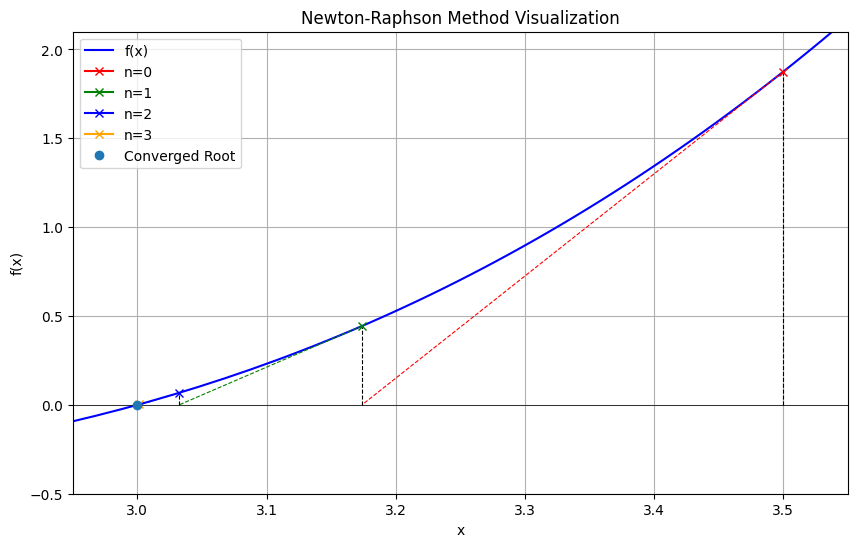

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**3 - 6*x**2 + 11*x - 6  # Roots at x=1,2,3

def f_prime(x):
    return 3*x**2 - 12*x + 11

# Newton-Raphson implementation


# Run the method
x0 = 3.5
x_sequence = newton_raphson(x0)

# Plotting
x = np.linspace(0, 4, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)', color='blue')
plt.axhline(0, color='black', linewidth=0.5)

# Plot iterations
colors = ['red', 'green', 'blue', 'orange', 'purple','black']
for i in range(len(x_sequence)-1):
    x_curr = x_sequence[i]
    x_next = x_sequence[i+1]
    i
    plt.plot([x_curr, x_curr], [0, f(x_curr)], 'k--', linewidth=0.8)
    plt.plot([x_curr, x_next], [f(x_curr), 0], linestyle='--',color=colors[i], linewidth=0.8)
    plt.plot(x_curr, f(x_curr), marker='x',color=colors[i],label=f"n={i}")

plt.plot(x_sequence[-1], f(x_sequence[-1]), 'o', label='Converged Root')
plt.title("Newton-Raphson Method Visualization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.xlim(2.95,3.55)
plt.ylim(-0.5,2.1)
plt.show()


####  **Beware of the limitations**: since the function has 3 roots, depending on where the algorithm starts it will find one or the other root

## **Observation: Newton-Raphson for min/max finding** 

One can also use Newton-Raphson to find maximum and minimums of a function. Remember that a necessary (but not sufficient) conditions for a maximum/minimum is that $f'(x)=0$, which is a root finding exercise on the derivative of the function.

Thus we may adapt the algorithm accordingly :

$$x_{1} = x_0 - \frac{f'(x_0)}{f''(x_0)}$$
is a better approximation of the root than $x_0$. The process is repeated,

$$x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}$$

In [5]:
def f_prime_2(x):
    return 6*x - 12
def newton_raphson_max_min(x0, tol=1e-2, max_iter=10):
    x_vals = [x0]
    for _ in range(max_iter):
        x_new = x_vals[-1] - f_prime(x_vals[-1]) / f_prime_2(x_vals[-1])
        x_vals.append(x_new)
        if abs(x_new - x_vals[-2]) < tol:
            break
    return x_vals

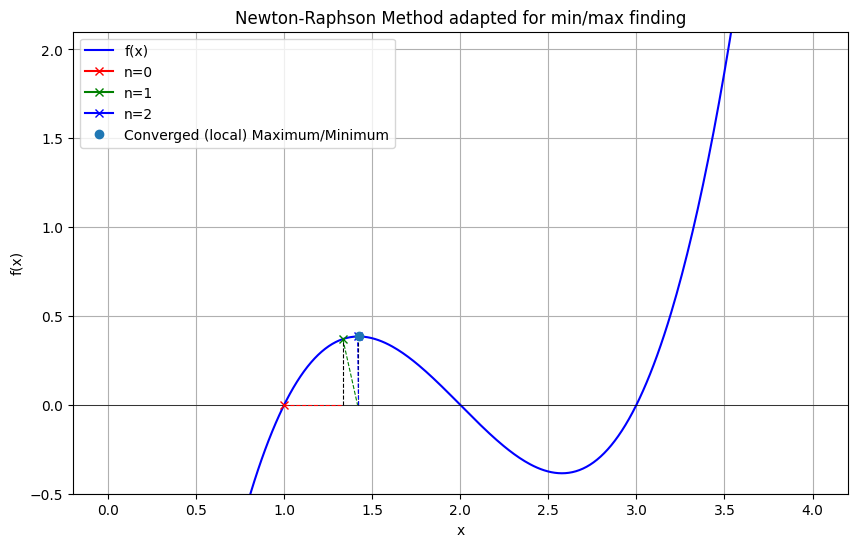

In [6]:


# Run the method
x0 = 1.0
x_sequence = newton_raphson_max_min(x0)

# Plotting
x = np.linspace(0, 4, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)', color='blue')
plt.axhline(0, color='black', linewidth=0.5)

# Plot iterations
colors = ['red', 'green', 'blue', 'orange', 'purple','black']
for i in range(len(x_sequence)-1):
    x_curr = x_sequence[i]
    x_next = x_sequence[i+1]
    i
    plt.plot([x_curr, x_curr], [0, f(x_curr)], 'k--', linewidth=0.8)
    plt.plot([x_curr, x_next], [f(x_curr), 0], linestyle='--',color=colors[i], linewidth=0.8)
    plt.plot(x_curr, f(x_curr), marker='x',color=colors[i],label=f"n={i}")

plt.plot(x_sequence[-1], f(x_sequence[-1]), 'o', label='Converged (local) Maximum/Minimum')
plt.title("Newton-Raphson Method adapted for min/max finding")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
#plt.xlim(2.95,3.55)
plt.ylim(-0.5,2.1)
plt.show()


**Note:** Keep in mind that any optimizer can only guarantee a local optimum. The only way a local optimum guarantees a global optimum is if the problem at hand is convex!

# Scipy's optimize Suite
SciPy is a powerful open-source Python library used for scientific and technical computing. It builds on NumPy and provides a rich collection of algorithms and functions for solving complex mathematical problems across many domains. 
#### Key Features of SciPy
- **Optimization**: Tools for minimizing or maximizing functions, including constrained and unconstrained problems.

- **Integration**: Numerical integration methods like quadrature and adaptive algorithms.

- **Interpolation**: Functions for interpolating data points in 1D, 2D, and higher dimensions.

- **Linear Algebra**: Advanced matrix operations, decompositions, and solvers.

- **Differential Equations**: Solvers for ordinary differential equations (ODEs).

- **Signal and Image Processing**: Filters, transforms, and feature extraction tools.

- **Statistics**: Probability distributions, statistical tests, and descriptive statistics.

We will first focus on the optimization suite. The main function tha you'll be using to perform a optimization algorithm is `scipy.optimize.minimize` https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

**Remark:** Note that $\min f(x)$ is equivalent to $\max -f(x)$, that's why in optimisation libraries, minimisation is handled by convention.


Let's use the minimize with the default arguments `scipy.optimize.minimize(function_to_minimize,initial_guess)`

**Observation:** Note that root finding of $f(x)$ is equivalent to $\min f(x)^2$

In [7]:
import scipy
solution=scipy.optimize.minimize(lambda x: f(x)**2,x0=3.5,options={'disp': True})
print("Found solution is:",solution.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 20
         Gradient evaluations: 10
Found solution is: [1.99999985]


We can choose from the suite of different solvers by providing the `method` argument. Let's use the **Newton-CG method**, which also requires the gradient or Jacobian of the function

In [8]:
solution=scipy.optimize.minimize(lambda x: f(x)**2,x0=3.5,jac=lambda x: 2*f(x)*f_prime(x),method="Newton-CG",options={'disp': True})
solution.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 15
         Hessian evaluations: 0


array([3.00000001])

We can also provide bounds if we are interested in finding a optimum within a region

In [9]:
solution=scipy.optimize.minimize(lambda x: f(x)**2,x0=1.5,bounds=[(0.9,1.3)])
print("Found solution is:",solution.x,"f(x) is",solution.fun)

Found solution is: [0.99999991] f(x) is 3.537338998485517e-14


# Curve Fitting and least squares

## Simple case with linear regression
Given a set of data points $(\boldsymbol{\mathrm{x}}_i,y_i)_{i=1,\ldots,n}$, 
for $y_i\in\mathbb{R}$ and $\boldsymbol{\mathrm{x}}_i\in \mathbb{R}^p$ for each $i=1,\ldots,n$, 
we want to determine the best linear regression model of the form
$$
y_i = \beta_1 x_{i,1} + \ldots + \beta_p x_{i,p} + \varepsilon_i
 = \sum_{j=1}^{p}\beta_{j} x_{i,j} + \varepsilon_i, 
\qquad\text{for }i=1,\ldots, n,
$$
for some $\boldsymbol{\beta}^\top = (\beta_1,\ldots,\beta_p)\in\mathbb{R}^{p}$, where the sequence $\boldsymbol{\varepsilon}^\top = (\varepsilon_1,\ldots,\varepsilon_n)$ forms an iid sequence of centered random noises with variance $\sigma^2>0$.
We can rewrite this in vector form as
$$
y_i = \boldsymbol{\mathrm{x}}_i^\top \boldsymbol{\beta} + \varepsilon_i,
$$
for each $i=1,\ldots,n$, or in matrix form
$$
\boldsymbol{\mathrm{y}} = \boldsymbol{\mathrm{x}}^\top \boldsymbol{\beta} + \boldsymbol{\varepsilon},
$$

The goal of the least square methods is to minimise the noise (or the error), namely to solve the minimisation problem
$$
\min_{\boldsymbol{\beta}}\left\|\boldsymbol{\mathrm{y}} - \boldsymbol{\mathrm{x}}^\top \boldsymbol{\mathrm{\beta}}\right\|_2^2
= \min_{\boldsymbol{\beta}}\sum_{i=1}^{n}\left(y_i - \boldsymbol{\mathrm{x}}_i^\top \boldsymbol{\beta}\right)^2.
$$
Standard linear regression theory yields the optimal coefficient
$$
\boldsymbol{\beta}^* = \left(\boldsymbol{\mathrm{x}}^\top\boldsymbol{\mathrm{x}}\right)^{-1}\boldsymbol{\mathrm{x}}^\top\boldsymbol{\mathrm{y}}.
$$

Scipy offers the `linregress` method to solve this https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [10]:
np.random.seed(0)
x=np.random.randn(100)
y=1.6*x+np.random.randn(100)
scipy.stats.linregress(x, y)

LinregressResult(slope=np.float64(1.7146984335463815), intercept=np.float64(0.07515308505251425), rvalue=np.float64(0.8594043837748317), pvalue=np.float64(2.626838116308204e-30), stderr=np.float64(0.10305046686003075), intercept_stderr=np.float64(0.10404543947505011))

In [11]:
X = np.concatenate((np.ones(len(x)).reshape(1,-1),x.reshape(1,-1)),axis=0).T#np.vstack([np.ones(len(x)),x ]).T
Y = y.reshape(-1,1)

# Direct least square regression
beta = np.dot((np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)),Y)

In [12]:
beta

array([[0.07515309],
       [1.71469843]])

C:\Users\aitor\AppData\Local\Temp\ipykernel_18792\1079125718.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(x, np.dot(X,beta), '*', label='fit: intercept=%5.3f slope=%5.3f' % tuple(beta))


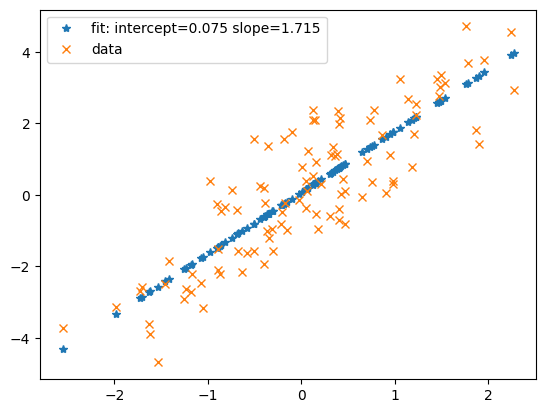

In [13]:
plt.plot(x, np.dot(X,beta), '*', label='fit: intercept=%5.3f slope=%5.3f' % tuple(beta))
plt.plot(x, y, 'x', label='data')
plt.legend()
plt.show()

## Generic curve fitting with scipy

For arbitrary curve fitting via least squares we can use `curve_fit` https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html


In [14]:
np.random.seed(0)
x=np.random.randn(100)
y=1.6*x**2+5*x+np.random.randn(100)
curve=lambda x,a,b: a*x**2+b*x
popt, pcov = scipy.optimize.curve_fit(curve, x,y)
print(popt)
print(pcov)

[1.5866672  5.12156352]
[[ 0.00402409 -0.00074123]
 [-0.00074123  0.01077021]]


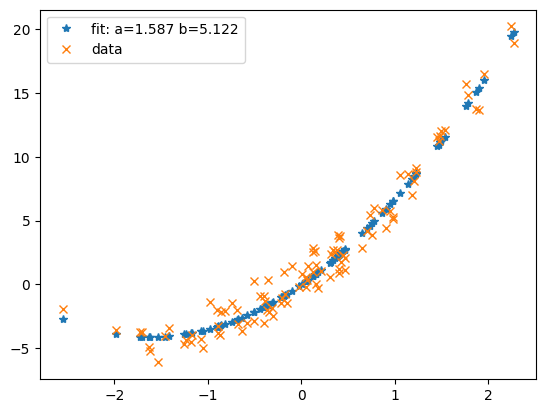

In [15]:

plt.plot(x, curve(x, *popt), '*', label='fit: a=%5.3f b=%5.3f' % tuple(popt))
plt.plot(x, y, 'x', label='data')
plt.legend()
plt.show()